<a href="https://colab.research.google.com/github/Mdrashid11/machine-learning/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.tree import plot_tree
from sklearn.metrics import precision_score, recall_score, f1_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import dataset
data=pd.read_csv("realest.csv")

In [5]:
# Display basic information and the first few rows of the dataset
data_info = data.info()
data_head = data.head()
data = pd.read_csv("realest.csv")
data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


(None,
    Price  Bedroom   Space  Room   Lot     Tax  Bathroom  Garage  Condition
 0   53.0      2.0   967.0   5.0  39.0   652.0       1.5     0.0        0.0
 1   55.0      2.0   815.0   5.0  33.0  1000.0       1.0     2.0        1.0
 2   56.0      3.0   900.0   5.0  35.0   897.0       1.5     1.0        0.0
 3   58.0      3.0  1007.0   6.0  24.0   964.0       1.5     2.0        0.0
 4   64.0      3.0  1100.0   7.0  50.0  1099.0       1.5     1.5        0.0)

In [6]:
 #Handle missing values by imputing with the median
imputer = SimpleImputer(strategy="median")
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [7]:
# Separate the features and the target variable
X = data_imputed.drop("Price", axis=1)
y = data_imputed["Price"]

In [20]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [21]:
# Create and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [42]:
# Predict on the test set
y_pred_dt = decision_tree_model.predict(X_test)


NameError: name 'classification_report' is not defined

In [23]:
# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

rmse_dt

5.181095444015677

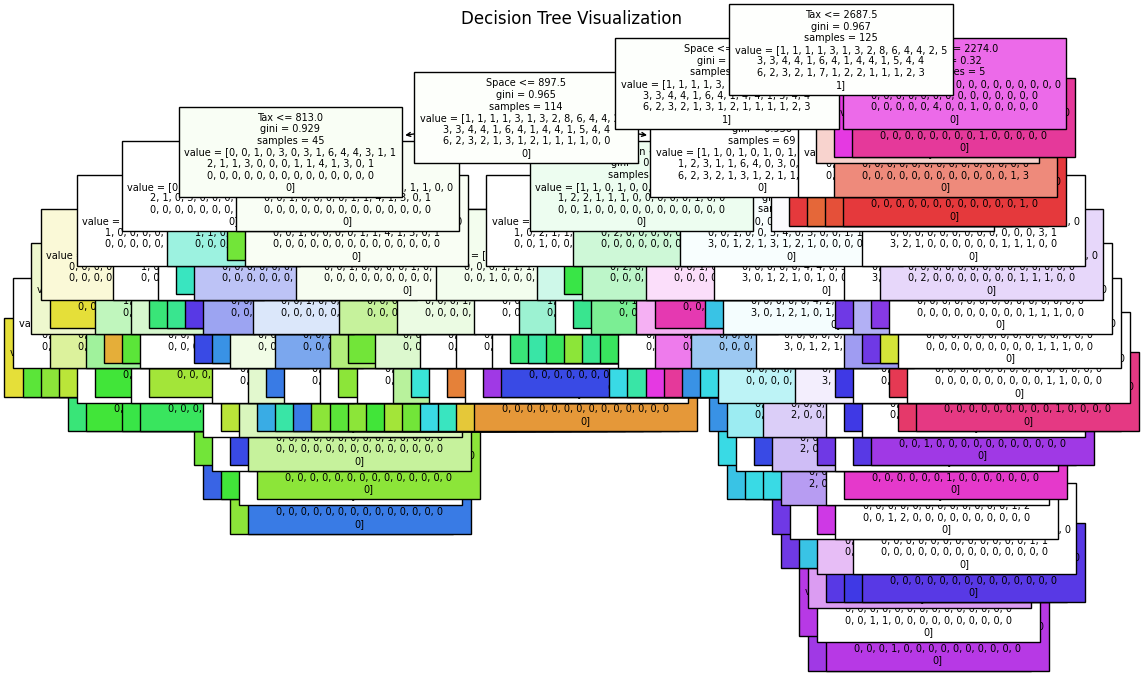

In [37]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree_model, feature_names=X.columns, filled=True, fontsize=7)
plt.title("Decision Tree Visualization")
plt.show()

In [48]:
# Predict on the test set
y_pred = decision_tree_model.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1) # Handle zero division
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)  # Handle zero division
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)  # Handle zero division

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Precision: 0.7239583333333333
Recall: 0.1875
F1-score: 0.18125
